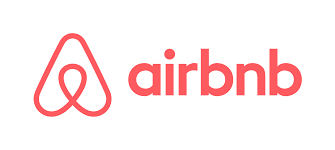

In [1]:
#import logo
from IPython.display import Image
Image('airbnb.png')

### Explore Seattle Airbnb Open Data

### Questions to answer:
#### What neighborhoods share similar average prices? Where do you look for an Airbnb given a specific budget?
#### What are the top 10 neighborhood groups in terms of average listing price?
#### Which review score has the highest correlation with the listing price?
#### What are the predictors for the listed price, and how do we price a house on Airbnb?

### Steps to Clean the dataset
#### 1. understand data and correct data types
#### 2.  evaludate missing data
#### 2. drop columns/fill missing data with means

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
df = pd.read_csv('./listings.csv')

In [3]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


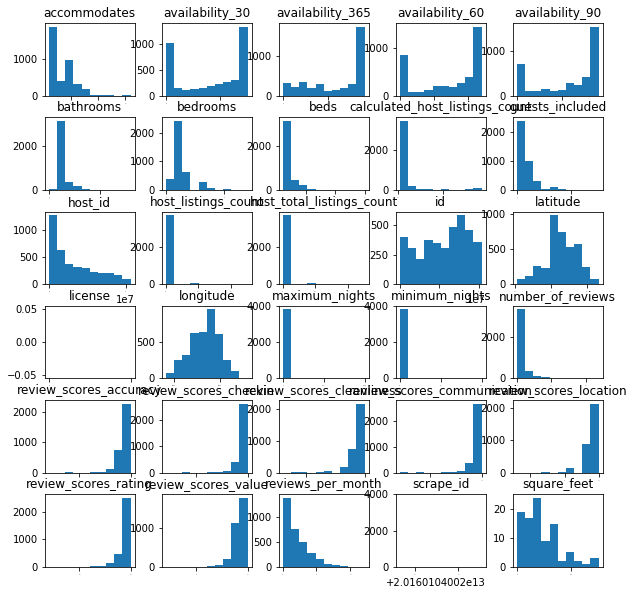

In [4]:
fig = df.hist(figsize = (10,10) , grid=False , xlabelsize = 1 )

#### By looking at the histogram, we know that license and scrape ID are likely not going to help us a lot. We can drop them now.

In [5]:
df_clean = df.drop(['scrape_id', 'license'], axis = 1)

#### Price is not showing up as a quantitaive varaible, let's take a look and fix it

In [6]:
#find all price col
list_e = []
for i in df_clean.columns:
    if 'price' in i: 
        list_e.append(i)

In [7]:
list_e

['price', 'weekly_price', 'monthly_price']

In [8]:
df_clean.price.head()

0     $85.00
1    $150.00
2    $975.00
3    $100.00
4    $450.00
Name: price, dtype: object

In [9]:
df_clean.price.dtypes

dtype('O')

In [10]:
def clean_dollar(df, col_name):
    df[col_name] = df[col_name].str.replace(',', '')
    df[col_name] = df[col_name].str.replace('$', '')
    df[col_name] = df[col_name].astype(float)
    return df[col_name].head()

In [11]:
df_clean['price'] = df_clean['price'].str.replace(',', '')
df_clean['price'] = df_clean['price'].str.replace('$', '')
df_clean['price'] = df_clean['price'].astype(float)

In [12]:
clean_dollar(df_clean, 'cleaning_fee')

0      NaN
1     40.0
2    300.0
3      NaN
4    125.0
Name: cleaning_fee, dtype: float64

In [13]:
clean_dollar(df_clean, 'extra_people')

0     5.0
1     0.0
2    25.0
3     0.0
4    15.0
Name: extra_people, dtype: float64

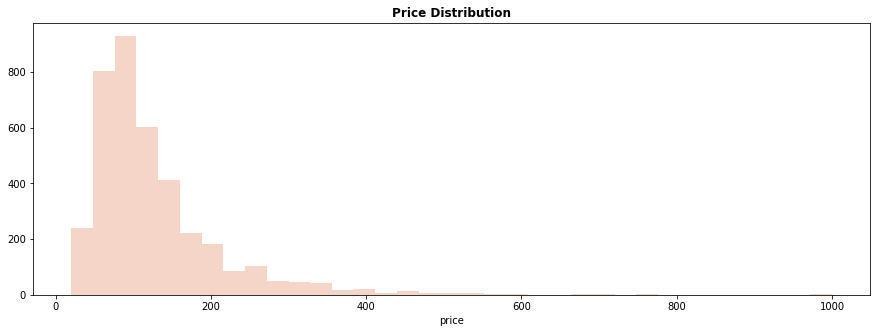

In [14]:
#Distribution plot for R12_Sales
plt.figure(figsize=(15,5))
sns.distplot(df_clean['price'], bins = 35, kde = False,  color='darksalmon')
plt.title('Price Distribution', 
              fontsize=12, fontweight='bold');

#### checking missing data pct > 40%

In [15]:
df_clean.columns[np.mean(df_clean.isnull()) > 0.4]

Index(['notes', 'square_feet', 'weekly_price', 'monthly_price',
       'security_deposit'],
      dtype='object')

In [16]:
df_clean = df_clean.drop(df_clean.columns[np.mean(df_clean.isnull()) > 0.4], axis = 1)

#### Fill the quantitiave column missing value with mean

In [17]:
quant_col_list = list(df_clean.select_dtypes(include=['float64', 'float64']).columns)

In [18]:
#remove long & lat from the list
quant_col_list.remove('latitude')
quant_col_list.remove('longitude')

In [19]:
quant_col_list

['host_listings_count',
 'host_total_listings_count',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'cleaning_fee',
 'extra_people',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [20]:
#clean all value in the list
for i in quant_col_list:
    df_clean[i] = df_clean[i].fillna(df_clean[i].mean())

#### 1.What are the top 5 neigborhood in terms of average listing price?
#### 2. .What are the bottom 5 neigborhood in terms of average listing price?

In [21]:
# check all neighbourhood cols
[i for i in df_clean.columns if 'neighbourhood' in i]

['host_neighbourhood',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed']

In [22]:
df[[i for i in df_clean.columns if 'neighbourhood' in i]].describe()

,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
count,3518,3402,3818,3818
unique,102,81,87,17
top,Capitol Hill,Capitol Hill,Broadway,Other neighborhoods
freq,405,351,397,794


In [23]:
#calculate average listing price for each neighbourhood_group_cleansed
df_mean_price = pd.DataFrame(df_clean.groupby('neighbourhood_group_cleansed').mean()['price'].sort_values(ascending = False)).reset_index()

#### Top 5 highest

In [24]:
df_mean_price.head()

,neighbourhood_group_cleansed,price
0,Magnolia,177.672131
1,Queen Anne,157.223729
2,Downtown,154.405660
3,West Seattle,141.359606
4,Cascade,140.101124


#### Bottom 5

In [25]:
df_mean_price.tail()

,neighbourhood_group_cleansed,price
12,University District,93.639344
13,Lake City,92.671642
14,Rainier Valley,91.899371
15,Northgate,88.550000
16,Delridge,83.278481


#### 3. Which review scores has the highest correlation with listed price?

In [26]:
review_col =[i for i in df_clean.columns if 'review_scores' in i]

In [27]:
review_col

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [28]:
#adding in price
review_col.append('price')

In [29]:
#calculate corr matrixs
corr = df_clean[review_col].corr()

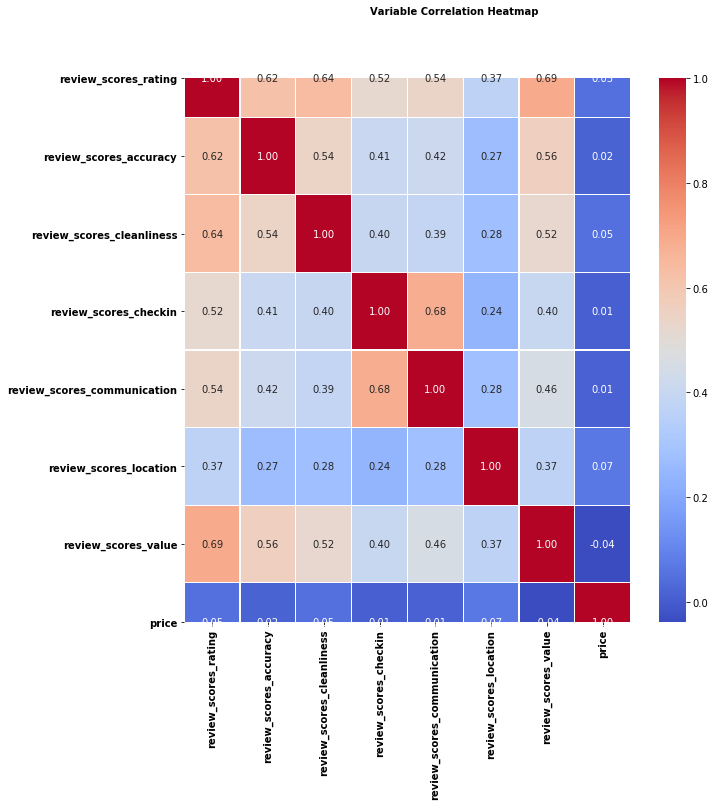

In [30]:
#Heatmap on Correlation Matrix
fig, (ax) = plt.subplots(1, 1, figsize=(10,10))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

# fig.subplots_adjust(top=0.95)
fig.suptitle('Variable Correlation Heatmap', 
              fontsize=10, 
              fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize = 10, fontweight='bold')
ax.set_yticklabels(ax.get_xticklabels(), fontsize = 10, fontweight='bold')
plt.show()

#### None of the review scores are highly correlated with listing price

#### what other features are correlated with price?

In [31]:
corr1 = df_clean.corr()

In [32]:
corr1 = corr1[(corr1 > 0.15) & (corr1 != 1)]

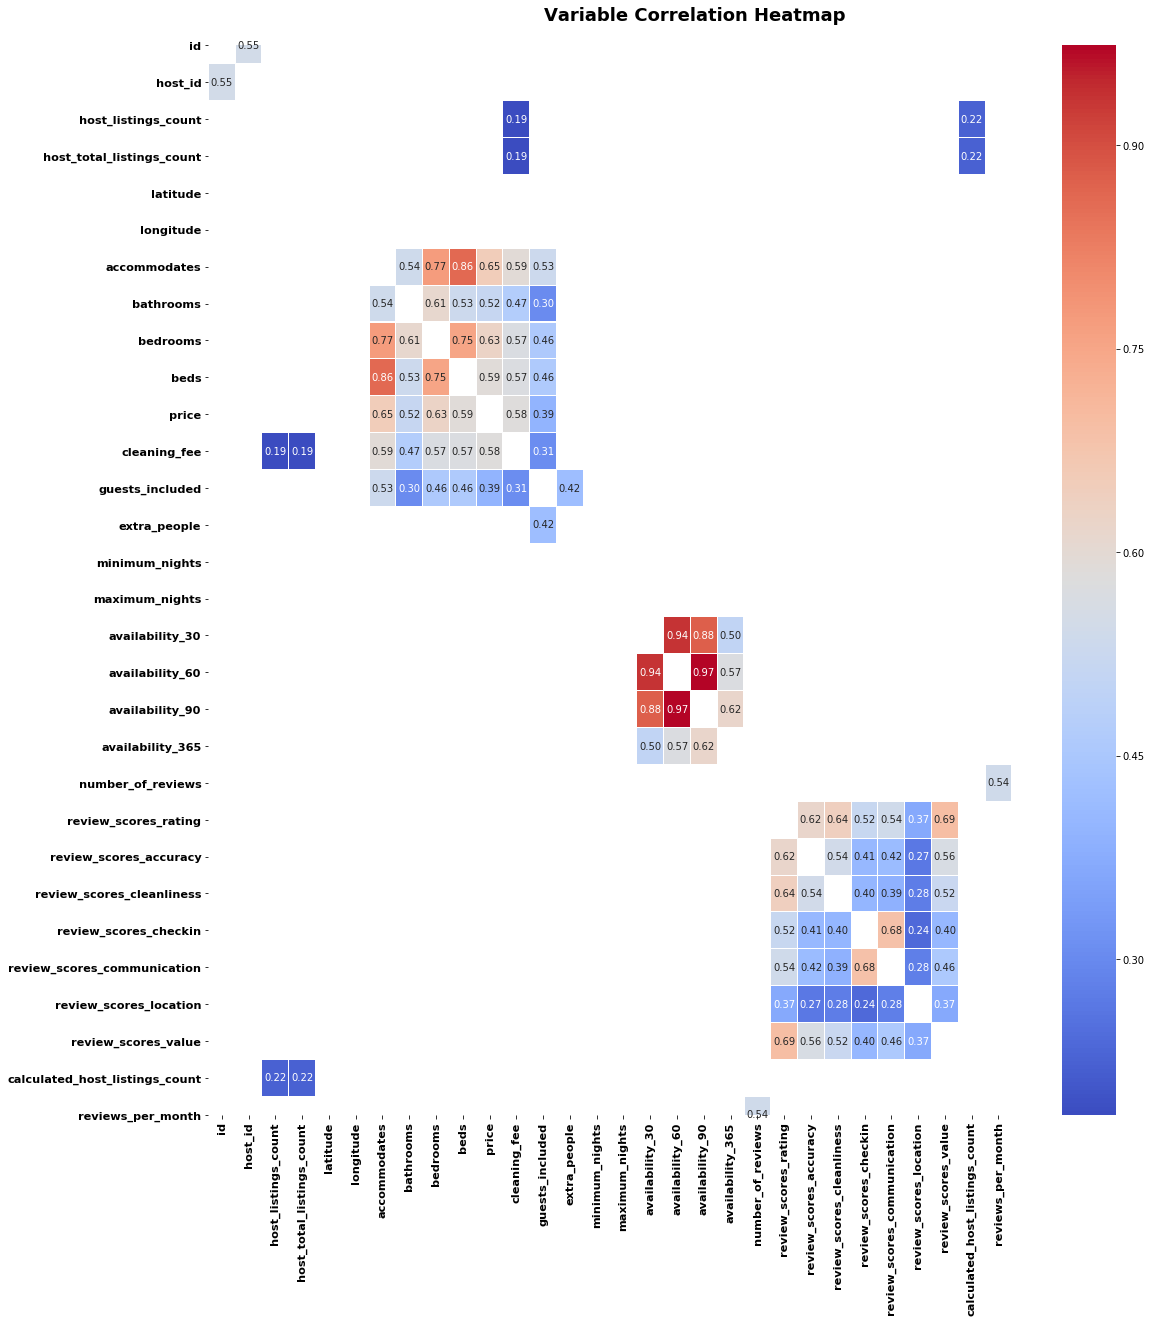

In [33]:
#Heatmap on Correlation Matrix

fig, (ax) = plt.subplots(1, 1, figsize=(18,18))

hm = sns.heatmap(corr1, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.95)
fig.suptitle('Variable Correlation Heatmap', 
              fontsize=18, 
              fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize = 11.3, fontweight='bold')
ax.set_yticklabels(ax.get_xticklabels(), fontsize = 11.3, fontweight='bold')
plt.show()

#### price is corrleated with # of bedrooms, # of bathrooms, # of accomandations

<Figure size 1080x576 with 0 Axes>

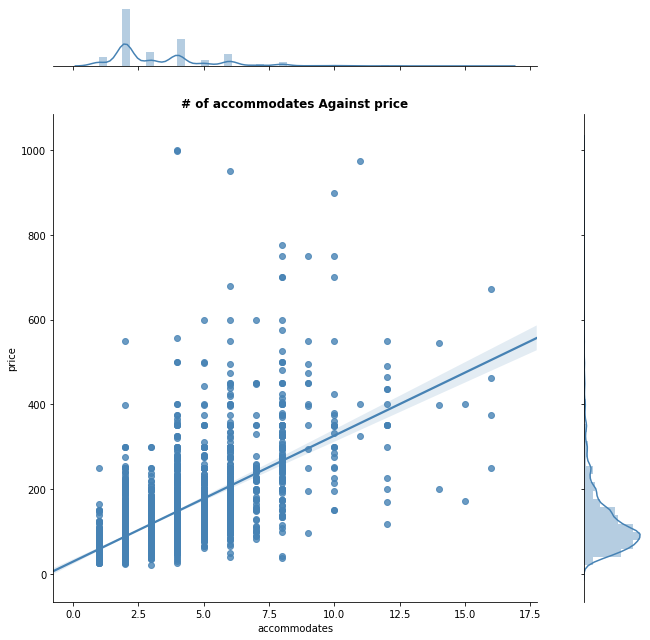

In [34]:
#Price Elasticity Against R12 Sales
plt.figure(figsize=(15,8))
sns.jointplot( x='accommodates',y ='price',data = df_clean, kind = 'reg', color = 'steelblue' , space = 0.8, height = 9)
#Curvature Relationship Exist! Non-linear 
plt.title('# of accommodates Against price', 
              fontsize=12, fontweight='bold');

<Figure size 1080x576 with 0 Axes>

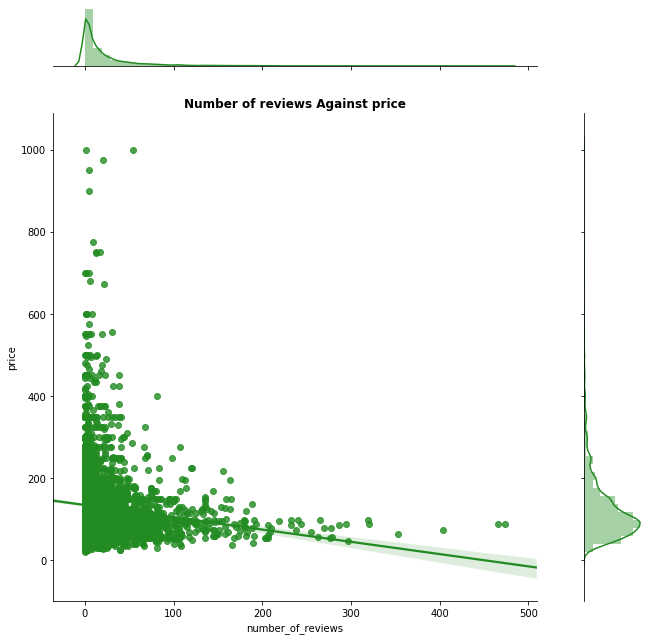

In [35]:
#Price Elasticity Against R12 Sales
plt.figure(figsize=(15,8))
sns.jointplot( x='number_of_reviews',y ='price',data = df_clean, kind = 'reg', color = 'forestgreen' , space = 0.8, height = 9)
#Curvature Relationship Exist! Non-linear 
plt.title('Number of reviews Against price', 
              fontsize=12, fontweight='bold');

In [36]:
eda = df_clean[[ 'price', 'number_of_reviews','accommodates' , 'beds']]

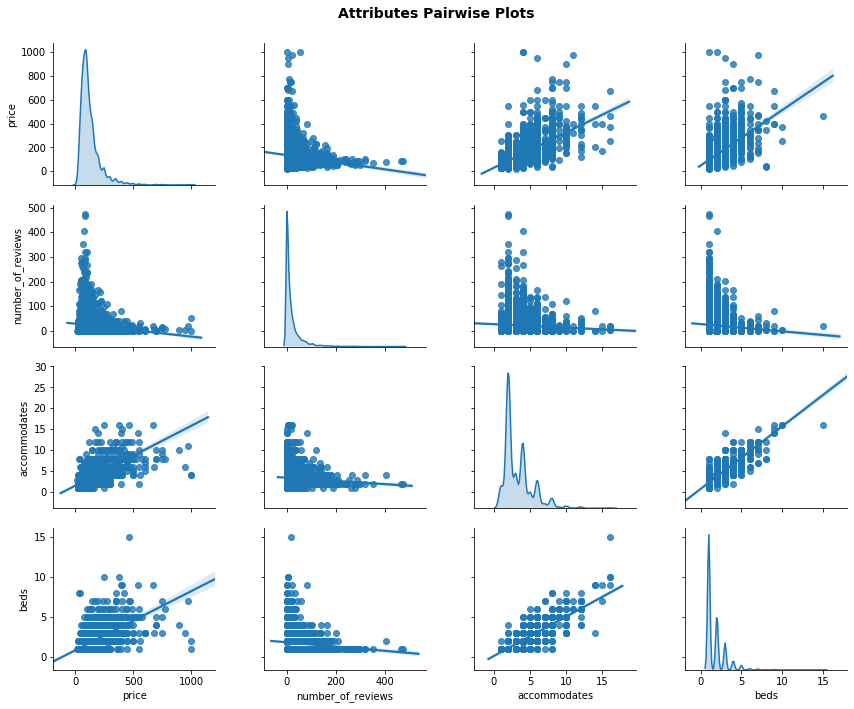

In [37]:
g = sns.pairplot(eda,
                 aspect=1.2,
                 diag_kws=dict(shade=True),
                 diag_kind="kde", kind="reg")
fig = g.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Attributes Pairwise Plots', 
              fontsize=14, fontweight='bold');

In [38]:
df_clean.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'cleani

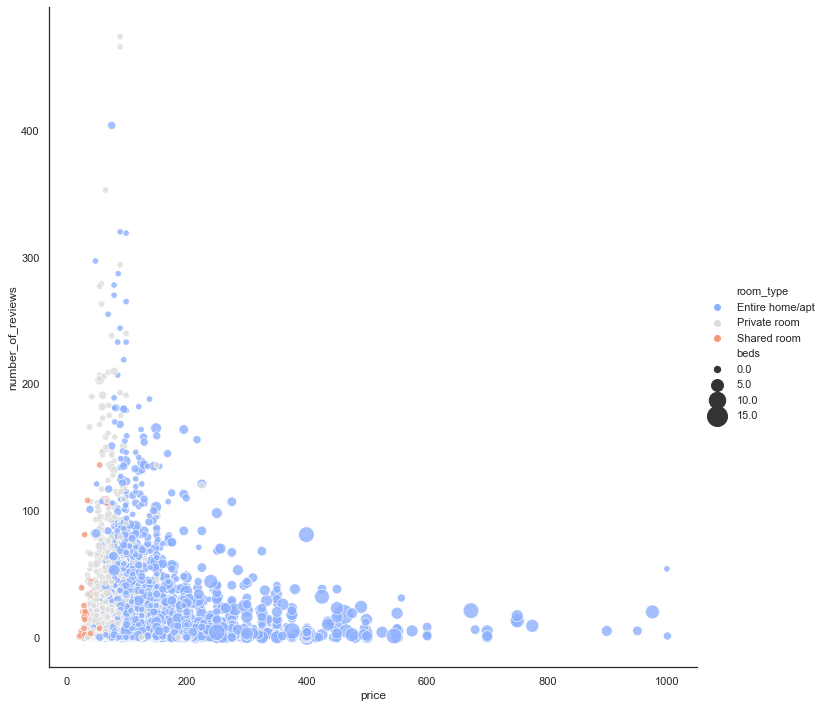

In [39]:
sns.set(style="white")
sns.relplot(x="price", y="number_of_reviews", size = 'beds', hue = 'room_type',
            sizes=(40, 400), alpha=.8, palette="coolwarm",
            height=10, data=df_clean)

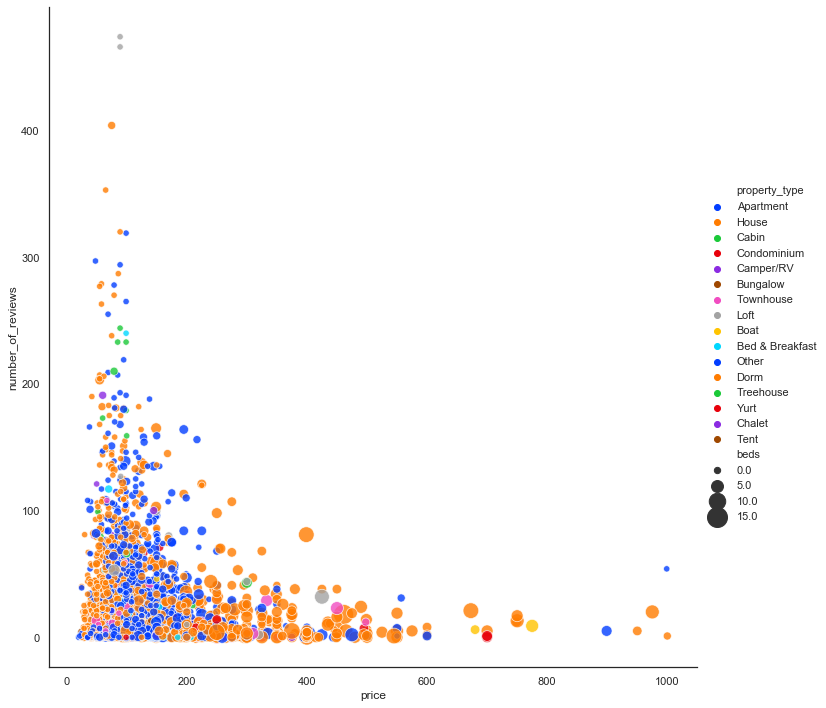

In [40]:
sns.set(style="white")
sns.relplot(x="price", y="number_of_reviews", size = 'beds', hue = 'property_type',palette="bright",
            sizes=(40, 400), alpha=.8, 
            height=10, data=df_clean);

### Intuition

As shown in the first graph above, we see a clear trend of shifting from shared room to entire room, and finally entire property. Also, more beds usually lead to a higher price. However, there are some outliers around the $1000 price tag
In addition, In the second graph, we can see that most higher-priced listings are house, with a few apartment exceptions.

## Modeling 
### Methodology : Two main algorithm to find the major predictor of Listing Price
#### -  1. Polynomial Regression 
#### - 2. Lasso Regression


#### Categorical Data Preprocessing

In [41]:
df_clean.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [42]:
df_clean.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'cleani

In [43]:
df_mod = df_clean.copy()
keep_col = ['neighbourhood_group_cleansed', 
        'latitude', 'longitude',
        'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds',  'price',
       'cleaning_fee']
#drop url and other index
df_mod = df_mod[keep_col]

In [44]:
df_cat = df_mod.select_dtypes(include= ['object']).columns

In [45]:
#create dummy variables
X= pd.get_dummies(df_mod,prefix = df_cat, columns = df_cat)

In [46]:
X = X.drop(columns = 'price', axis = 1)
y = df_mod['price']

In [47]:
def coef_weights(coefficients, X_train):
    coefs_df = pd.DataFrame()
    coefs_df['col_name'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

### Polynomial Regression

In [48]:
#Training and test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [49]:

lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 

y_test_preds = lm_model.predict(X_test) 

print(r2_score(y_test, y_test_preds)) 

0.5935587427557314


In [50]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(5)

,col_name,coefs,abs_coefs
16,neighbourhood_group_cleansed_Magnolia,1.608503e+14,1.608503e+14
10,neighbourhood_group_cleansed_Cascade,1.608503e+14,1.608503e+14
13,neighbourhood_group_cleansed_Downtown,1.608503e+14,1.608503e+14
19,neighbourhood_group_cleansed_Queen Anne,1.608503e+14,1.608503e+14
9,neighbourhood_group_cleansed_Capitol Hill,1.608503e+14,1.608503e+14


In [51]:
preds_vs_act = pd.DataFrame(np.hstack([y_test.values.reshape(y_test.size,1), y_test_preds.reshape(y_test.size,1)]))
preds_vs_act.columns = ['actual', 'preds']
preds_vs_act['diff'] = preds_vs_act['actual'] - preds_vs_act['preds']
preds_vs_act.head()

,actual,preds,diff
0,55.0,57.06250,-2.06250
1,82.0,157.09375,-75.09375
2,68.0,69.25000,-1.25000
3,58.0,95.06250,-37.06250
4,130.0,107.28125,22.71875


<Figure size 1080x576 with 0 Axes>

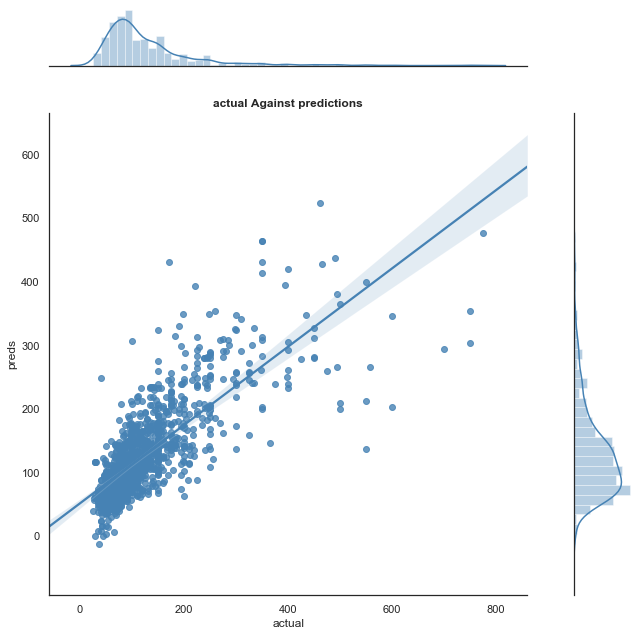

In [52]:
#plot actual against prediction
plt.figure(figsize=(15,8))
sns.jointplot( x='actual',y ='preds',data = preds_vs_act, kind = 'reg', color = 'steelblue' , space = 0.8, height = 9)
plt.title('actual Against predictions', 
              fontsize=12, fontweight='bold');

### Lasso Regression

In [53]:
from sklearn.tree import DecisionTreeRegressor
dectree = DecisionTreeRegressor(max_depth = 4)
dectree.fit(X_train, y_train) 
y_test_preds = dectree.predict(X_test) 

In [54]:
#R2_score
print("R2-score: %.2f" % r2_score(y_test, y_test_preds) )

R2-score: 0.50


Text(0, 0.5, 'Predicted Y')

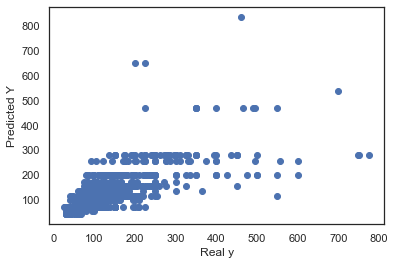

In [55]:
#Visulize prediction 
plt.scatter(x = y_test, y = y_test_preds)
plt.xlabel('Real y')
plt.ylabel('Predicted Y')

In [56]:
# export the decision tree to a tree.dot file 
# visualizing the plot 
from sklearn.tree import export_graphviz
from sklearn import tree
export_graphviz(dectree, out_file ='tree.dot', 
               feature_names =X.columns)  

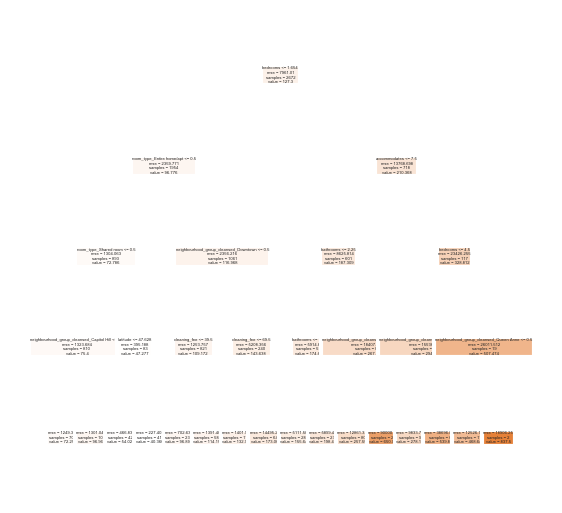

In [57]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(dectree,
               feature_names = X.columns, 
               class_names='price',
               filled = True);

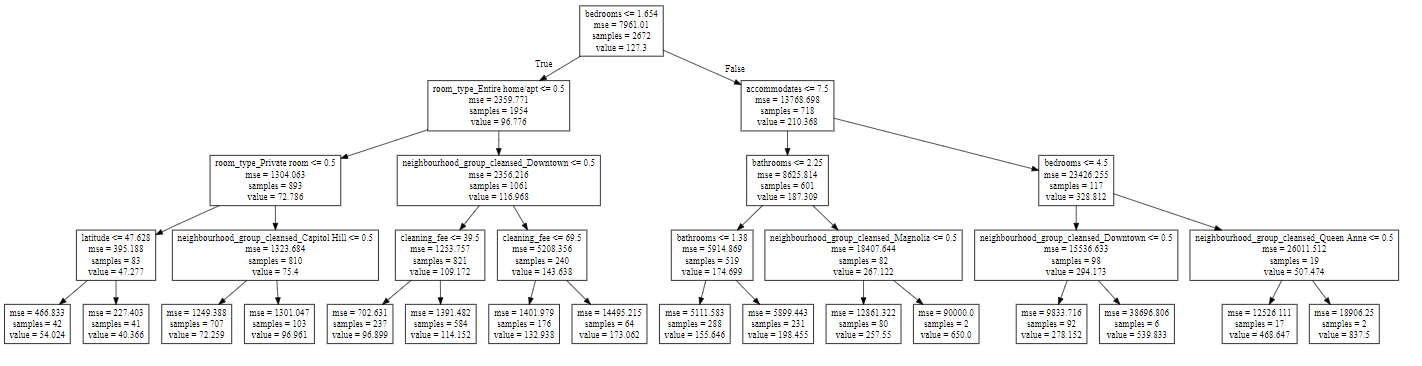

In [58]:
Image("Dtree.png")

In [59]:
# get importance
importance = dectree.feature_importances_

In [60]:
dectree.n_features_

43

In [61]:
X_train.columns

Index(['latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'cleaning_fee', 'neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_Seward Park',
       'neighbourhood_group_cleansed_University District',
       'neighbourhood_group_cleansed_West Seattle', 'property_type_Apartment',
       'prop

In [63]:
feature_df = pd.DataFrame()
feature_df['col_name'] = X_train.columns
feature_df['importance'] = dectree.feature_importances_

In [68]:
feature_df.sort_values(by= 'importance', ascending= False).head()

,col_name,importance
4,bedrooms,0.593248
2,accommodates,0.155131
40,room_type_Entire home/apt,0.074880
3,bathrooms,0.066436
13,neighbourhood_group_cleansed_Downtown,0.047966
